## import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## load datasets

In [2]:
# load random undersampling data
X_rus_train = pd.read_csv('data/rus/X_rus_train.csv')
X_rus_test = pd.read_csv('data/rus/X_rus_test.csv')

y_rus_train = pd.read_csv('data/rus/y_rus_train.csv')
y_rus_test = pd.read_csv('data/rus/y_rus_test.csv')

## train random forest classifiers

random forest hyperparameters

- n_estimators: int | number of trees in the forest
- max_depth: int | maximum depth of the tree 
- min_samples_split : int, float | minimum number of samples required to split an internal node
- min_samples_leaf: int, float | minimum number of samples required to be at a leaf node 
- max_features: {“sqrt”, “log2”, None}, int or float | number of features when looking for the best split


### random forest on random undersampling dataset

#### finding best n_estimators

In [3]:
N_ESTIMATORS = np.arange(5, 205, 5)
ACC = []
best_acc = 0
best_n_estimator = 0

In [4]:
for n_estimator in N_ESTIMATORS:
    model_rf = RandomForestClassifier(
        n_estimators=n_estimator, random_state=7)

    model_rf.fit(X_rus_train, y_rus_train)
    y_pred = model_rf.predict(X_rus_test)
    accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)
    ACC.append(accuracy)

    if accuracy > best_acc:
        best_acc = accuracy
        best_n_estimator = n_estimator

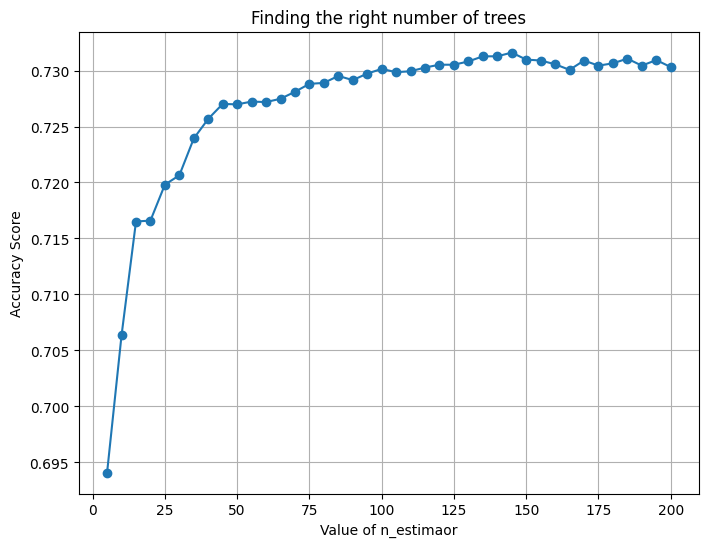

In [5]:
plt.figure(figsize=(8,6))
plt.plot(N_ESTIMATORS, ACC, marker = "o")
plt.xlabel("Value of n_estimaor")
plt.ylabel("Accuracy Score")
plt.title("Finding the right number of trees")
plt.grid()

In [7]:
print('the best number of trees in forest is:', best_n_estimator)
print('the best accuracy with {} number of trees in forest is {}'.format(best_n_estimator, best_acc))

the best number of trees in forest is: 145
the best accuracy with 145 number of trees in forest is 0.7316046191687164


#### finding best max_features

In [37]:
MAX_FEATURES = ['auto', None,'sqrt', 0.95, 0.75, 0.5, 0.25, 0.10]
ACC = []
best_acc = 0
best_max_features = 0

In [38]:
for max_feature in MAX_FEATURES:
    model_rf = RandomForestClassifier(n_estimators=145, 
        max_features=max_feature, random_state=7)

    model_rf.fit(X_rus_train, y_rus_train)
    y_pred = model_rf.predict(X_rus_test)
    accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)
    ACC.append(accuracy)

    if accuracy > best_acc:
        best_acc = accuracy
        best_max_features = max_feature

Text(0.5, 1.0, 'Finding the right max_features of Tree')

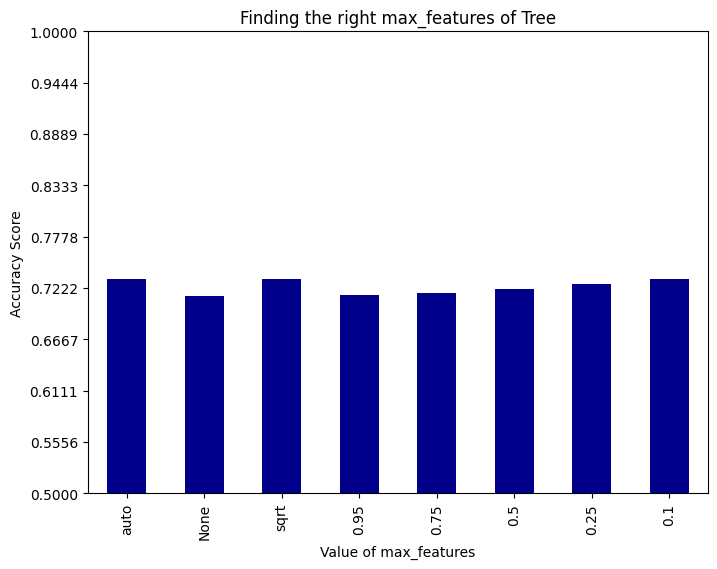

In [ ]:
plt.figure(figsize=(8, 6))
pd.Series(ACC, MAX_FEATURES).plot(kind="bar",color="darkblue",ylim=(0.5,0.9))
plt.xlabel("Value of max_features")
plt.ylabel("Accuracy Score")
plt.yticks(np.linspace(0.5,1,10))
plt.title("Finding the right max_features of Tree")

In [12]:
print('the best max features in forest is:', best_max_features)
print('the best accuracy with {} max features in tree is {}'.format(best_max_features, best_acc))

the best max features in forest is: auto
the best accuracy with auto max features in tree is 0.7316046191687164


#### finding best min_samples_leaf

In [26]:
MIN_SAMPLES_LEAF = np.arange(5, 55, 5)
ACC = []
best_acc = 0
best_min_samples_leaf = 0

In [27]:
for min_samples_leaf in MIN_SAMPLES_LEAF:
    model_rf = RandomForestClassifier(n_estimators=145, 
        max_features='auto', min_samples_leaf=min_samples_leaf, random_state=17)

    model_rf.fit(X_rus_train, y_rus_train)
    y_pred = model_rf.predict(X_rus_test)
    accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)
    ACC.append(accuracy)

    if accuracy > best_acc:
        best_acc = accuracy
        best_min_samples_leaf = min_samples_leaf

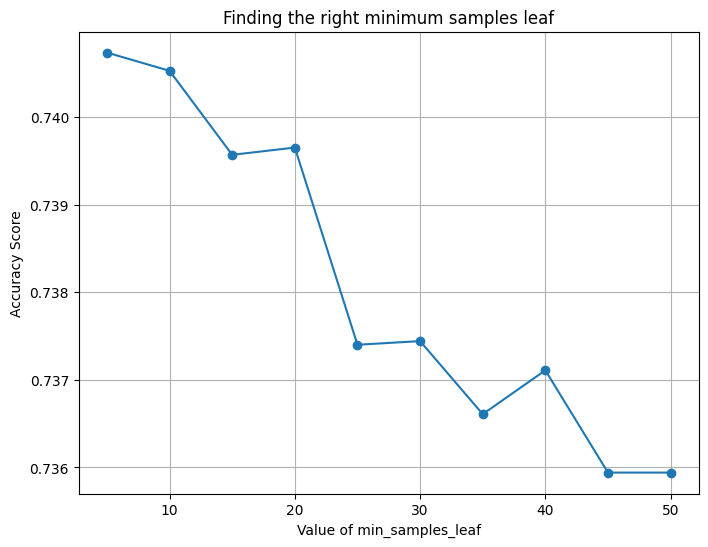

In [28]:
plt.figure(figsize=(8,6))
plt.plot(MIN_SAMPLES_LEAF, ACC, marker = "o")
plt.xlabel("Value of min_samples_leaf")
plt.ylabel("Accuracy Score")
plt.title("Finding the right minimum samples leaf")
plt.grid()

In [30]:
print('the best minimum samples leaf in tree is:', best_min_samples_leaf)
print('the best accuracy with {} minimum samples leaf in tree is {}'.format(best_min_samples_leaf, best_acc))

the best minimum samples leaf in tree is: 5
the best accuracy with 5 minimum samples leaf in tree is 0.7407345645558011


#### finding best max_depth

In [39]:
MAX_DEPTH = [None, 1, 2, 3, 5, 7, 9, 11]
ACC = []
best_acc = 0
best_max_depth = 0

In [40]:
for max_depth in MAX_DEPTH:
    model_rf = RandomForestClassifier(n_estimators=145, 
        max_features='auto', min_samples_leaf=5 , 
        max_depth=max_depth, random_state=27)

    model_rf.fit(X_rus_train, y_rus_train)
    y_pred = model_rf.predict(X_rus_test)
    accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)
    ACC.append(accuracy)

    if accuracy > best_acc:
        best_acc = accuracy
        best_max_depth = max_depth

Text(0.5, 1.0, 'Finding the right maximum depth of Tree')

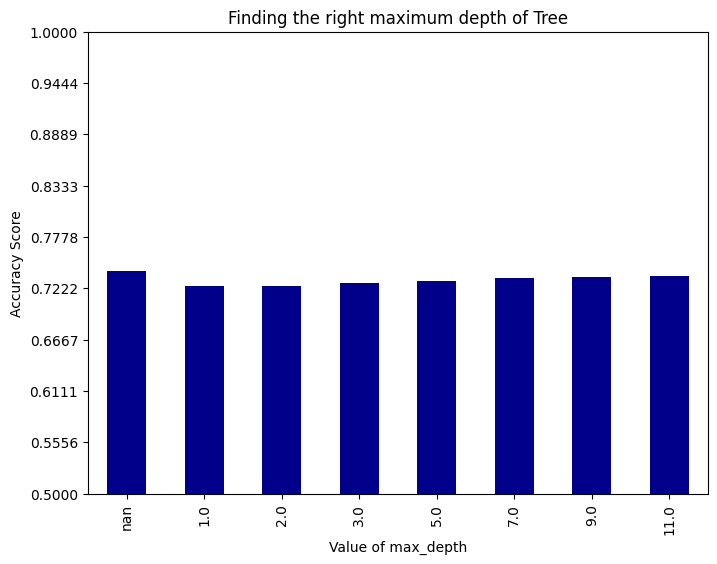

In [41]:
plt.figure(figsize=(8, 6))
pd.Series(ACC, MAX_DEPTH).plot(kind="bar", color="darkblue", ylim=(0.5,0.9))
plt.xlabel("Value of max_depth")
plt.ylabel("Accuracy Score")
plt.yticks(np.linspace(0.5, 1,10))
plt.title("Finding the right maximum depth of Tree")

In [42]:
print('the best max depth in tree is:', best_max_depth)
print('the best accuracy with {} max depth in tree is {}'.format(best_max_depth, best_acc))

the best max depth in tree is: None
the best accuracy with None max depth in tree is 0.7408179430524867


In [45]:
print('on random undersampling the best hyperparameters with accuracy {} are:'.format(best_acc))
print(f'{best_n_estimator = }, {best_max_features = }, {best_min_samples_leaf = }, {best_max_depth = }')

on random undersampling the best hyperparameters with accuracy 0.7408179430524867 are:
best_n_estimator = 145, best_max_features = 'auto', best_min_samples_leaf = 5, best_max_depth = None
